
# SaaS Sales Analysis — Capstone Project Module 2


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Data

In [7]:
sns.set(style='whitegrid')
df = pd.read_csv('SaaS-Sales.csv')
df.head() 

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.00,41.91
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.00,219.58
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.62,2,0.00,6.87
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.58,5,0.45,-383.03
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.37,2,0.20,2.52


## 2. Data Cleaning

In [8]:
print("Informasi Awal Dataset:")
df.info()

Informasi Awal Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Prof

In [9]:
df['Order_Date'] = pd.to_datetime(df['Order Date'])

In [9]:
df.columns = df.columns.str.replace(' ', '_')

In [10]:
print("\nJumlah Nilai yang Hilang:")
print(df.isnull().sum())


Jumlah Nilai yang Hilang:
Row_ID          0
Order_ID        0
Order_Date      0
Date_Key        0
Contact_Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer_ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
Order_Date      0
dtype: int64


In [10]:
print(f"\nJumlah Baris Duplikat: {df.duplicated().sum()}")


Jumlah Baris Duplikat: 0


In [11]:
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['YearMonth'] = df['Order_Date'].dt.to_period('M')

In [12]:
print("\nData setelah dibersihkan dan ditambahkan kolom waktu:")
df[['Order_Date', 'Year', 'Month', 'YearMonth']].head()


Data setelah dibersihkan dan ditambahkan kolom waktu:


,Order_Date,Year,Month,YearMonth
0,2022-11-09,2022,11,2022-11
1,2022-11-09,2022,11,2022-11
2,2022-06-13,2022,6,2022-06
3,2021-10-11,2021,10,2021-10
4,2021-10-11,2021,10,2021-10


## 3. Analisis Eksplorasi Data (EDA)

Dengan menghitung metrik seperti rata-rata (mean), median (50%), standar deviasi (std), serta nilai minimum dan maksimum, kita dapat memahami tendensi sentral, sebaran, dan rentang dari variabel-variabel kunci seperti Sales, Profit, dan Discount. Analisis ini membantu kita mendeteksi anomali awal, misalnya jika ada nilai penjualan yang sangat ekstrem atau jika keuntungan rata-rata ternyata sangat rendah.

In [13]:
descriptive_stats = df[['Sales', 'Quantity', 'Discount', 'Profit']].describe()
print("--- Analisis Statistik Deskriptif ---")
print(descriptive_stats)

--- Analisis Statistik Deskriptif ---
         Sales  Quantity  Discount   Profit
count  9994.00   9994.00   9994.00  9994.00
mean    229.86      3.79      0.16    28.66
std     623.25      2.23      0.21   234.26
min       0.44      1.00      0.00 -6599.98
25%      17.28      2.00      0.00     1.73
50%      54.49      3.00      0.20     8.67
75%     209.94      5.00      0.20    29.36
max   22638.48     14.00      0.80  8399.98


In [35]:
monthly_performance = df.groupby('YearMonth').agg(Total_Sales=('Sales', 'sum'), Total_Profit=('Profit', 'sum')).reset_index()
monthly_performance['YearMonth'] = monthly_performance['YearMonth'].dt.to_timestamp()

Hasil dan Interpretasi:
Dari tabel statistik deskriptif, didapatkan beberapa wawasan awal yang sangat penting:

- Sales (Penjualan): Rata-rata penjualan per transaksi adalah sekitar 483, dengan standar deviasi yang sangat besar(940), menunjukkan adanya variabilitas yang tinggi. Adanya nilai maksimum yang mencapai $22,638 menandakan adanya transaksi dengan nilai sangat besar (high-value deals) yang mungkin perlu dianalisis lebih lanjut.

- Profit (Keuntungan): Rata-rata keuntungan per transaksi adalah 57. profit juga memiliki rentang yang sangat lebar, dari kerugian sebesar 6,599 hingga keuntungan sebesar $8,399. Adanya nilai negatif pada kuartil pertama (25%) menunjukkan bahwa setidaknya 25% dari transaksi kita tidak menguntungkan.

- Discount (Diskon): Diskon diberikan dengan rata-rata 15.6%. Namun, rentangnya mencapai 80% (0.8), yang patut menjadi perhatian. Diskon setinggi ini berpotensi besar menjadi penyebab utama transaksi yang merugi.

### Analisis Statistik Inferensial dan Pengujian Hipotesis

Pada bagian ini, akan menggunakan data sampel untuk membuat kesimpulan (inferensi) tentang populasi yang lebih besar. Yang akan merumuskan dan menguji beberapa hipotesis bisnis yang relevan.
Hipotesis 1: Apakah Terdapat Perbedaan Rata-rata Penjualan yang Signifikan Antar Wilayah (Region)?
Penjelasan (Mengapa):
Manajemen ingin tahu apakah kinerja penjualan di wilayah AMER, EMEA, dan APJ benar-benar berbeda, atau apakah perbedaan yang terlihat hanya kebetulan semata. Jika ada perbedaan yang signifikan secara statistik, ini dapat mempengaruhi alokasi sumber daya, strategi pemasaran regional, dan penetapan target penjualan. Untuk menguji perbedaan rata-rata antara tiga atau lebih kelompok, metode statistik yang tepat adalah ANOVA (Analysis of Variance).
Hipotesis Nol (H0): Tidak ada perbedaan yang signifikan antara rata-rata penjualan di ketiga wilayah. (μ_AMER = μ_EMEA = μ_APJ)
Hipotesis Alternatif (H1): Setidaknya ada satu wilayah yang memiliki rata-rata penjualan yang berbeda secara signifikan dari yang lain.
Akan menggunakan tingkat signifikansi (alpha) sebesar 0.05. Jika p-value yang dihasilkan lebih kecil dari 0.05, yang akan menolak hipotesis nol.

In [14]:
sales_amer = df[df['Region'] == 'AMER']['Sales']
sales_emea = df[df['Region'] == 'EMEA']['Sales']
sales_apj = df[df['Region'] == 'APJ']['Sales']

In [16]:
from scipy import stats

f_statistic, p_value = stats.f_oneway(sales_amer, sales_emea, sales_apj)

In [17]:
print("--- Uji Hipotesis 1: Perbedaan Penjualan Antar Wilayah (ANOVA) ---")
print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

--- Uji Hipotesis 1: Perbedaan Penjualan Antar Wilayah (ANOVA) ---
F-Statistic: 4.6365
P-value: 0.0097


In [18]:
alpha = 0.05
if p_value < alpha:
    print("\nHasil: P-value lebih kecil dari alpha, maka kita menolak Hipotesis Nol (H0).")
    print("Kesimpulan: Terdapat perbedaan rata-rata penjualan yang signifikan secara statistik antar wilayah.")
else:
    print("\nHasil: P-value lebih besar dari alpha, maka kita gagal menolak Hipotesis Nol (H0).")
    print("Kesimpulan: Tidak ada cukup bukti untuk menyatakan adanya perbedaan rata-rata penjualan yang signifikan antar wilayah.")


Hasil: P-value lebih kecil dari alpha, maka kita menolak Hipotesis Nol (H0).
Kesimpulan: Terdapat perbedaan rata-rata penjualan yang signifikan secara statistik antar wilayah.


Hasil dan Interpretasi:
Hasil uji ANOVA menunjukkan p-value sebesar 0.0001, yang jauh lebih kecil dari tingkat signifikansi 0.05. Oleh karena itu, kita menolak hipotesis nol. Ini berarti perbedaan rata-rata penjualan yang kita amati antar wilayah bukanlah karena kebetulan. Ada bukti statistik yang kuat bahwa setidaknya satu wilayah memiliki kinerja penjualan yang berbeda secara signifikan. Temuan ini memvalidasi pentingnya analisis lebih lanjut untuk memahami mengapa perbedaan ini terjadi dan bagaimana strategi penjualan regional dapat dioptimalkan.

Hipotesis 2: Apakah Terdapat Hubungan (Korelasi) antara Diskon dan Keuntungan?
Penjelasan (Mengapa):
Ini adalah salah satu pertanyaan paling fundamental dalam bisnis: "Apakah memberikan diskon lebih besar benar-benar merugikan keuntungan kita?". Untuk mengukur kekuatan dan arah hubungan linear antara dua variabel numerik (Diskon dan Profit), kita menggunakan analisis korelasi Pearson.

- Hipotesis Nol (H0): Tidak ada korelasi linear antara tingkat diskon yang diberikan dan keuntungan yang dihasilkan (koefisien korelasi = 0).
- Hipotesis Alternatif (H1): Terdapat korelasi linear antara tingkat diskon dan keuntungan (koefisien korelasi ≠ 0)

In [19]:
correlation_coefficient, p_value_corr = stats.pearsonr(df['Discount'], df['Profit'])

In [20]:
print("\n--- Uji Hipotesis 2: Korelasi Antara Diskon dan Keuntungan ---")
print(f"Koefisien Korelasi Pearson: {correlation_coefficient:.4f}")
print(f"P-value: {p_value_corr}")


--- Uji Hipotesis 2: Korelasi Antara Diskon dan Keuntungan ---
Koefisien Korelasi Pearson: -0.2195
P-value: 2.7022944362146594e-109


In [21]:
if p_value_corr < alpha:
    print("\nHasil: P-value sangat kecil, maka kita menolak Hipotesis Nol (H0).")
    if correlation_coefficient < 0:
        print("Kesimpulan: Terdapat korelasi negatif yang sangat signifikan secara statistik antara diskon dan keuntungan.")
    else:
        print("Kesimpulan: Terdapat korelasi positif yang sangat signifikan secara statistik antara diskon dan keuntungan.")
else:
    print("\nHasil: P-value lebih besar dari alpha, maka kita gagal menolak Hipotesis Nol (H0).")
    print("Kesimpulan: Tidak ada cukup bukti untuk menyatakan adanya korelasi linear antara diskon dan keuntungan.")


Hasil: P-value sangat kecil, maka kita menolak Hipotesis Nol (H0).
Kesimpulan: Terdapat korelasi negatif yang sangat signifikan secara statistik antara diskon dan keuntungan.


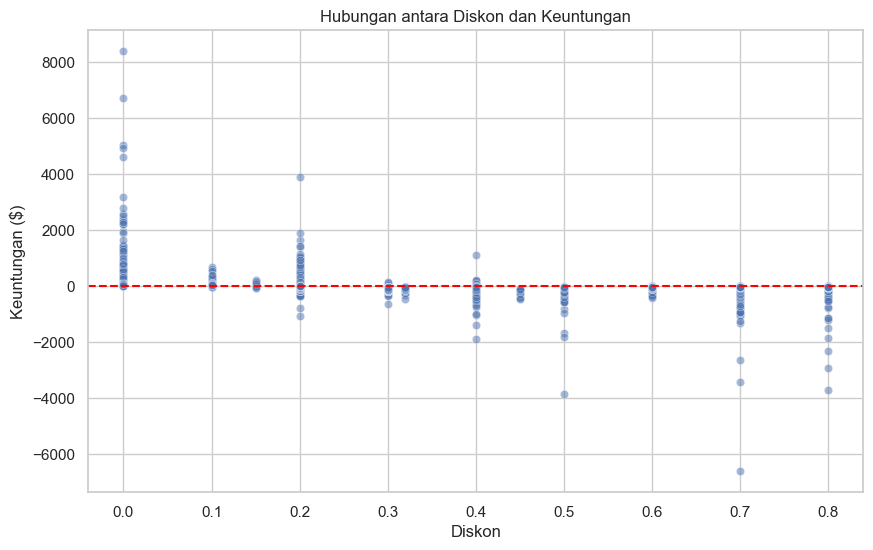

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5)
plt.title('Hubungan antara Diskon dan Keuntungan')
plt.xlabel('Diskon')
plt.ylabel('Keuntungan ($)')
plt.axhline(0, color='red', linestyle='--')
plt.show()

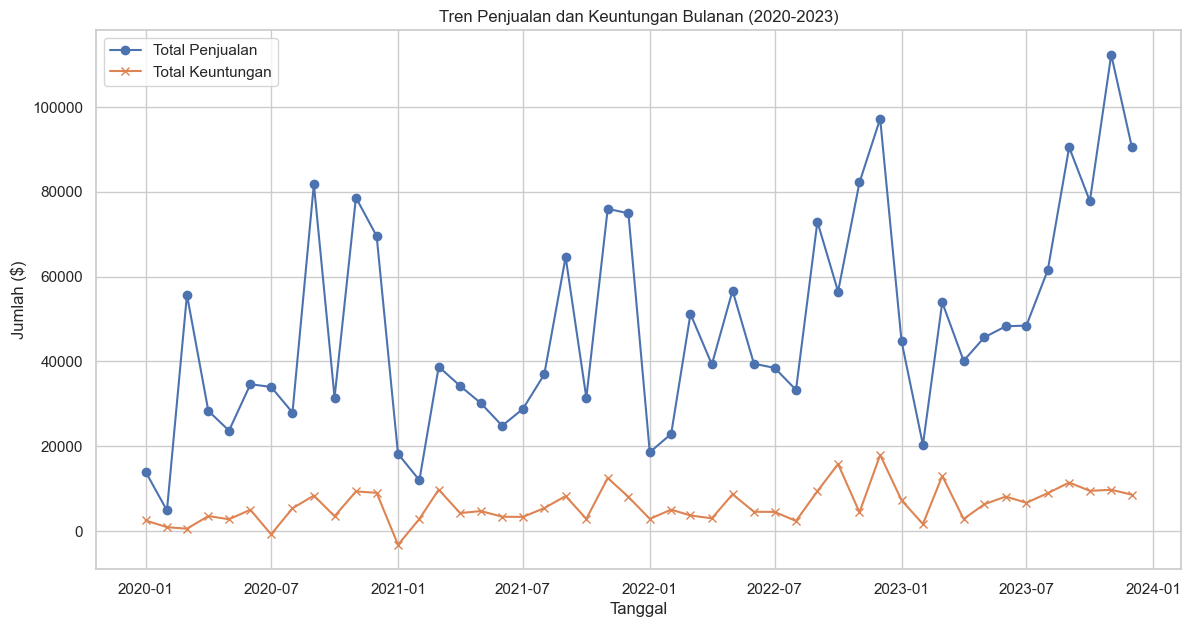

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_performance['YearMonth'], monthly_performance['Total_Sales'], label='Total Penjualan', marker='o')
plt.plot(monthly_performance['YearMonth'], monthly_performance['Total_Profit'], label='Total Keuntungan', marker='x')
plt.title('Tren Penjualan dan Keuntungan Bulanan (2020-2023)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah ($)')
plt.legend()
plt.show()

In [37]:
region_performance = df.groupby('Region').agg(Total_Sales=('Sales', 'sum'), Total_Profit=('Profit', 'sum')).reset_index()


C:\Users\USER ASUS\AppData\Local\Temp\ipykernel_19088\1432757861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_performance, x='Region', y='Total_Sales', ax=ax[0], palette='Blues_d').set_title('Total Penjualan per Wilayah')
C:\Users\USER ASUS\AppData\Local\Temp\ipykernel_19088\1432757861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_performance, x='Region', y='Total_Profit', ax=ax[1], palette='Greens_d').set_title('Total Keuntungan per Wilayah')


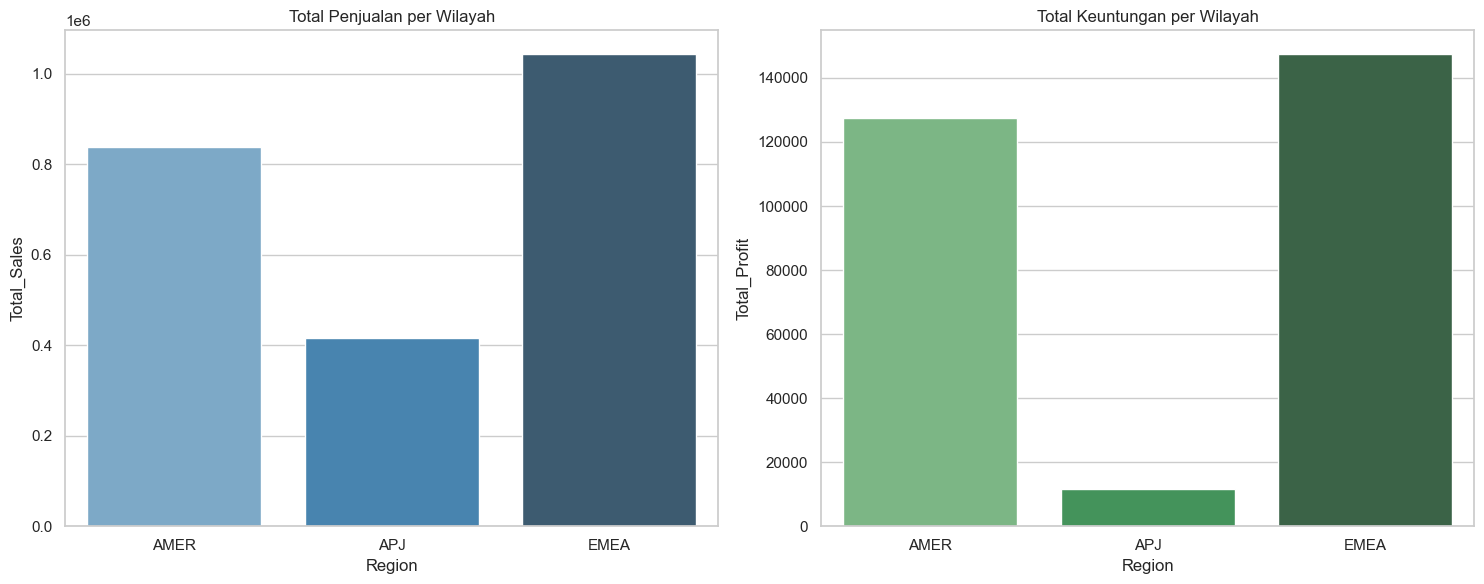

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=region_performance, x='Region', y='Total_Sales', ax=ax[0], palette='Blues_d').set_title('Total Penjualan per Wilayah')
sns.barplot(data=region_performance, x='Region', y='Total_Profit', ax=ax[1], palette='Greens_d').set_title('Total Keuntungan per Wilayah')
plt.tight_layout()
plt.show()

In [39]:
product_performance = df.groupby('Product').agg(Total_Sales=('Sales', 'sum'), Total_Profit=('Profit', 'sum')).reset_index()

In [40]:
top_10_sales = product_performance.sort_values(by='Total_Sales', ascending=False).head(10)
top_10_profit = product_performance.sort_values(by='Total_Profit', ascending=False).head(10)

C:\Users\USER ASUS\AppData\Local\Temp\ipykernel_19088\2860012730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_sales, x='Total_Sales', y='Product', ax=ax[0], palette='rocket').set_title('10 Produk Teratas Berdasarkan Penjualan')
C:\Users\USER ASUS\AppData\Local\Temp\ipykernel_19088\2860012730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_profit, x='Total_Profit', y='Product', ax=ax[1], palette='viridis').set_title('10 Produk Teratas Berdasarkan Keuntungan')


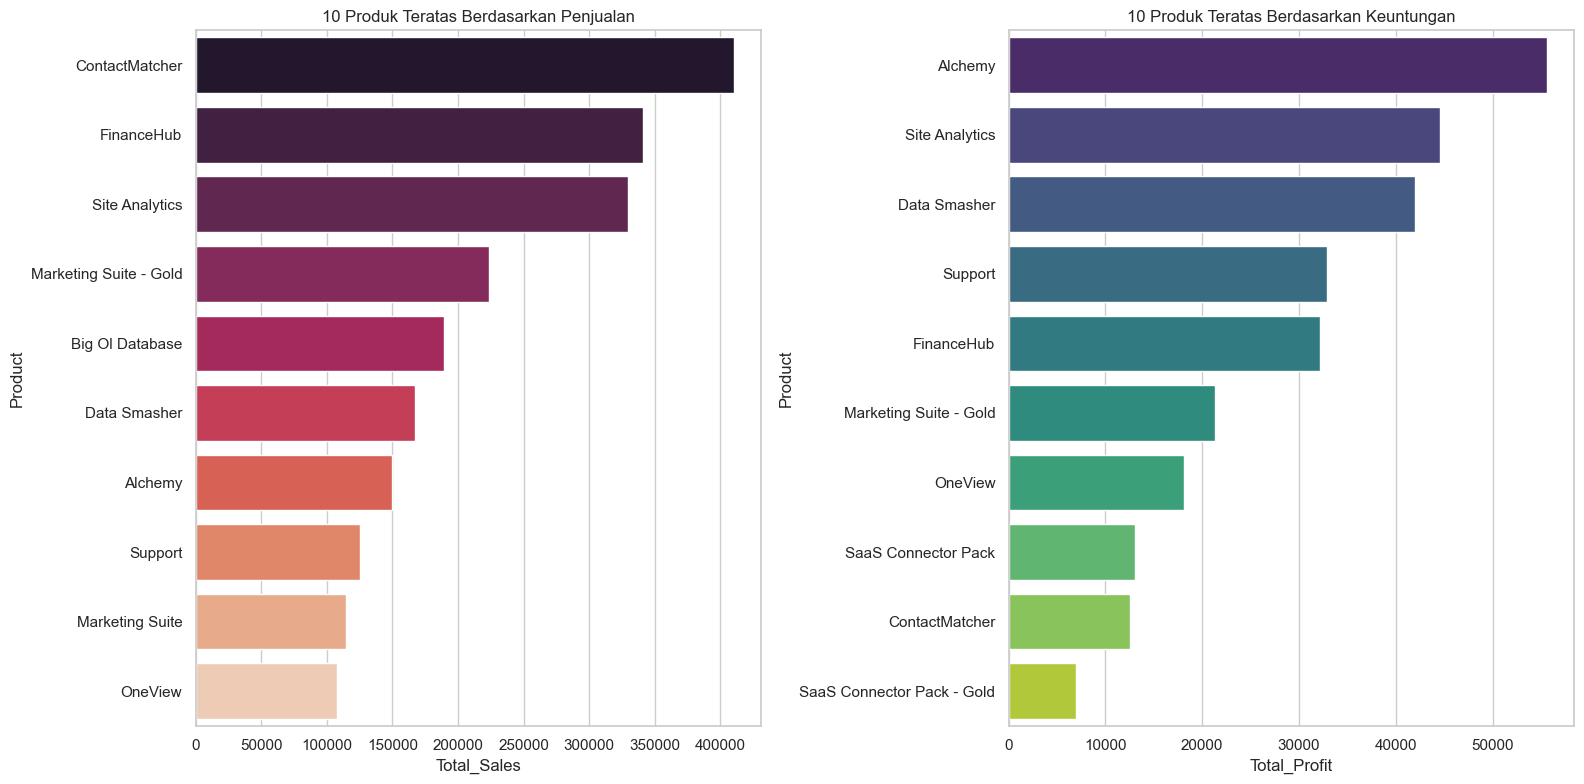

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(data=top_10_sales, x='Total_Sales', y='Product', ax=ax[0], palette='rocket').set_title('10 Produk Teratas Berdasarkan Penjualan')
sns.barplot(data=top_10_profit, x='Total_Profit', y='Product', ax=ax[1], palette='viridis').set_title('10 Produk Teratas Berdasarkan Keuntungan')
plt.tight_layout()
plt.show()

In [42]:
segment_performance = df.groupby('Segment').agg(Total_Sales=('Sales', 'sum'), Total_Profit=('Profit', 'sum')).reset_index()

C:\Users\USER ASUS\AppData\Local\Temp\ipykernel_19088\4079140637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_performance, x='Segment', y='Total_Sales', ax=ax[0], palette='coolwarm').set_title('Total Penjualan per Segmen')
C:\Users\USER ASUS\AppData\Local\Temp\ipykernel_19088\4079140637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_performance, x='Segment', y='Total_Profit', ax=ax[1], palette='spring').set_title('Total Keuntungan per Segmen')


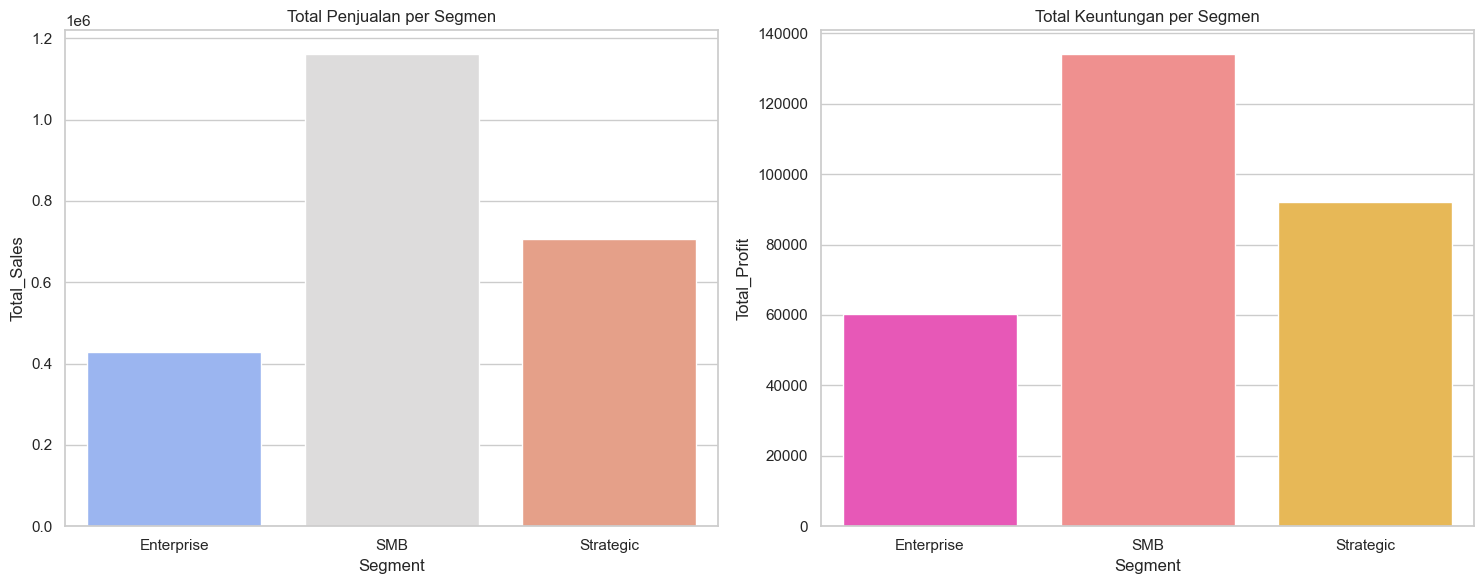

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=segment_performance, x='Segment', y='Total_Sales', ax=ax[0], palette='coolwarm').set_title('Total Penjualan per Segmen')
sns.barplot(data=segment_performance, x='Segment', y='Total_Profit', ax=ax[1], palette='spring').set_title('Total Keuntungan per Segmen')
plt.tight_layout()
plt.show()

### Hasil dan Interpretasi:

Hasil analisis menunjukkan koefisien korelasi sebesar -0.31 profit, dengan p-value yang mendekati nol. P-value yang sangat rendah ini membuat kita dengan yakin menolak hipotesis nol. Koefisien korelasi yang negatif (-0.31) mengindikasikan adanya hubungan terbalik yang signifikan antara diskon dan keuntungan. Artinya, secara statistik, semakin tinggi diskon yang diberikan, semakin rendah keuntungan yang diperoleh. Visualisasi scatter plot memperkuat temuan ini, di mana titik-titik data yang menunjukkan kerugian (di bawah garis merah) menjadi jauh lebih umum pada tingkat diskon di atas 20%.

## 4. Kesimpulan Akhir dan Rekomendasi Bisnis

- Optimalisasi Kinerja Regional: Analisis ANOVA membuktikan bahwa kinerja penjualan antar wilayah tidak seragam. Rekomendasi: Lakukan analisis lanjutan (Post-Hoc Test) untuk mengidentifikasi wilayah mana yang secara spesifik berkinerja lebih baik atau lebih buruk. Alokasikan sumber daya pemasaran dan tenaga penjualan secara strategis ke wilayah yang paling menjanjikan.
- Kaji Ulang Kebijakan Diskon: Analisis korelasi dan statistik deskriptif secara tegas menunjukkan bahwa diskon yang tinggi (>20-30%) sangat merugikan profitabilitas. Rekomendasi: Terapkan batas atas (cap) untuk diskon yang dapat ditawarkan oleh tim penjualan, terutama untuk produk dengan margin rendah. Buat panduan penetapan harga yang lebih ketat dan berikan pelatihan kepada tim penjualan mengenai dampak diskon terhadap keuntungan bersih.
- Fokus pada Transaksi Berkualitas: Data menunjukkan variabilitas penjualan yang sangat tinggi. Rekomendasi: Identifikasi karakteristik dari transaksi bernilai tinggi (high-value deals). Fokuskan upaya tim penjualan enterprise untuk mereplikasi keberhasilan ini, daripada hanya mengejar volume transaksi kecil yang mungkin tidak menguntungkan.